<a href="https://colab.research.google.com/github/jesinthkal/Projects/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data

In [27]:
url = "https://raw.githubusercontent.com/jesinthkal/bi-analytics-data/refs/heads/main/sales_data_10years.csv"
df = pd.read_csv(url)

Ensure numeric columns & correct month column

In [28]:
df.columns = df.columns.str.strip().str.lower()
print("Detected Columns:", df.columns.tolist())

month_col = None
for col in df.columns:
    if "month" in col:
        month_col = col
        break
if month_col is None:
    month_col = df.columns[0]  # fallback: first column

# ✅ Convert Month column to datetime
df['Month'] = pd.to_datetime(df[month_col], errors='coerce')

# Extract Year + Month Name
df['Year'] = df['Month'].dt.year
df['Month_Name'] = df['Month'].dt.strftime('%b')

# Ensure numeric
df['Sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['Expenses'] = pd.to_numeric(df['expenses'], errors='coerce')

Detected Columns: ['date', 'sales', 'expenses']


Calculate Profit


In [29]:
df['Profit'] = df['Sales'] - df['Expenses']

Monthly Summary Statistics Sales and Profit Trends & Find Month with Maximum Profit


📊 Monthly Sales Summary:
              sales      expenses                Month         Year  \
count    120.000000    120.000000                  120   120.000000   
mean   30521.408333  16876.816667  2019-12-16 10:48:00  2019.500000   
min    15161.000000   6924.000000  2015-01-01 00:00:00  2015.000000   
25%    21390.500000  12167.250000  2017-06-23 12:00:00  2017.000000   
50%    30307.500000  16250.000000  2019-12-16 12:00:00  2019.500000   
75%    38673.500000  21150.500000  2022-06-08 12:00:00  2022.000000   
max    48827.000000  32803.000000  2024-12-01 00:00:00  2024.000000   
std     9985.584481   5966.334721                  NaN     2.884324   

              Sales      Expenses        Profit  
count    120.000000    120.000000    120.000000  
mean   30521.408333  16876.816667  13644.591667  
min    15161.000000   6924.000000   5285.000000  
25%    21390.500000  12167.250000   9068.000000  
50%    30307.500000  16250.000000  13857.000000  
75%    38673.500000  21150.500000 

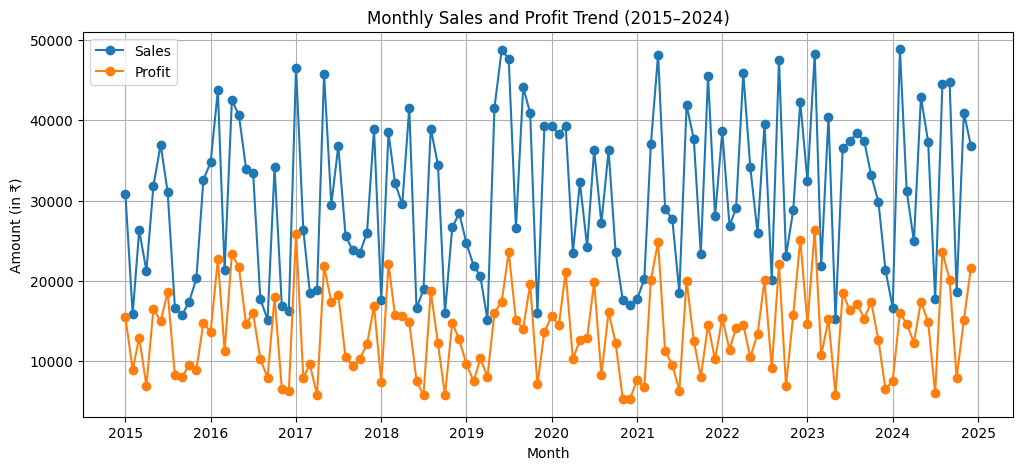

✅ Month with Highest Profit: Feb-2023


In [30]:

print("\n📊 Monthly Sales Summary:")
print(df.describe())

plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['Sales'], marker='o', label='Sales')
plt.plot(df['Month'], df['Profit'], marker='o', label='Profit')
plt.title('Monthly Sales and Profit Trend (2015–2024)')
plt.xlabel('Month')
plt.ylabel('Amount (in ₹)')
plt.legend()
plt.grid(True)
plt.show()

# Max Profit Month
max_profit_month = df.loc[df['Profit'].idxmax(), 'Month'].strftime('%b-%Y')
print(f"✅ Month with Highest Profit: {max_profit_month}")

yearly Summary Statistics Sales and Profit Trends & Find Month with Maximum Profit


📊 Yearly Sales Summary:
             Year          Sales       Expenses         Profit
count    10.00000      10.000000      10.000000      10.000000
mean   2019.50000  366256.900000  202521.800000  163735.100000
std       3.02765   33175.452844   24825.463768   12384.264527
min    2015.00000  296805.000000  152735.000000  144070.000000
25%    2017.25000  351628.500000  187988.000000  153623.000000
50%    2019.50000  367506.000000  208032.000000  164150.000000
75%    2021.75000  390987.000000  222912.750000  175676.000000
max    2024.00000  405089.000000  227678.000000  178628.000000


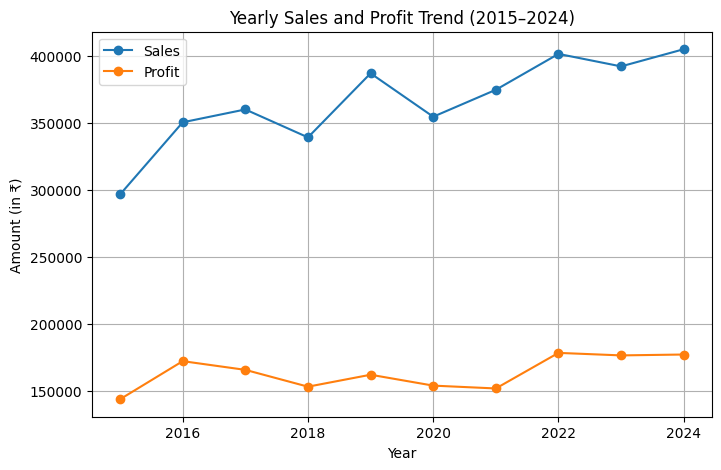

✅ Year with Highest Profit: 2022


In [31]:
yearly_df = df.groupby('Year').sum(numeric_only=True)[['Sales', 'Expenses', 'Profit']].reset_index()

print("\n📊 Yearly Sales Summary:")
print(yearly_df.describe())

plt.figure(figsize=(8, 5))
plt.plot(yearly_df['Year'], yearly_df['Sales'], marker='o', label='Sales')
plt.plot(yearly_df['Year'], yearly_df['Profit'], marker='o', label='Profit')
plt.title('Yearly Sales and Profit Trend (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Amount (in ₹)')
plt.legend()
plt.grid(True)
plt.show()

# Max Profit Year
max_profit_year = yearly_df.loc[yearly_df['Profit'].idxmax(), 'Year']
print(f"✅ Year with Highest Profit: {max_profit_year}")